# Logistic Regression
- Data Preparaion
- Visualisation
- Create Train & Test data
- Create a logistic Regression Model
- Predictions
- Decision boundary
- How to use Sk-learn

### Data preparation using Numpy

In [1]:
import numpy as np

In [2]:
mean_01 = np.array([1,0.5])
mean_02 = np.array([4,5])
std_01 = np.array([[1,0.1],[0.1,1.2]])
std_02 = np.array([[1.2,0.1],[0.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_01,std_01,500)
dist_02 = np.random.multivariate_normal(mean_02,std_02,500)

print(dist_01.shape,dist_02.shape)

(500, 2) (500, 2)


In [3]:
import matplotlib.pyplot as plt

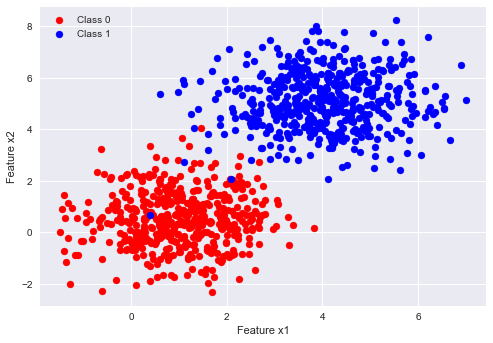

In [4]:
plt.style.use('seaborn')
plt.scatter(dist_01[:,0],dist_01[:,1],color='red',label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='blue',label='Class 1')
plt.legend()
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.show()

In [5]:
data = np.zeros((1000,3))

In [6]:
data.shape

(1000, 3)

In [7]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [8]:
np.random.shuffle(data)

In [9]:
data[:10]

array([[ 4.93028221,  4.92873794,  1.        ],
       [ 2.11000521,  4.81761173,  1.        ],
       [-0.07230744, -0.31070291,  0.        ],
       [ 2.1770777 ,  4.45104572,  1.        ],
       [ 2.67303988,  5.52784312,  1.        ],
       [ 2.13689937, -0.68364767,  0.        ],
       [ 0.63681781,  0.61846512,  0.        ],
       [ 1.43265298, -0.91442844,  0.        ],
       [ 0.67122353,  1.33640986,  0.        ],
       [-0.94045425,  0.75317235,  0.        ]])

In [10]:
split = int(0.8*data.shape[0])

In [11]:
split

800

In [47]:
X_train = data[:split,:2]
X_test = data[split:,:2]

Y_train = data[:split,-1]
Y_test = data[split:,-1]

In [48]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(800, 2) (800,) (200, 2) (200,)


### Training data visualisation and Data Normalisation

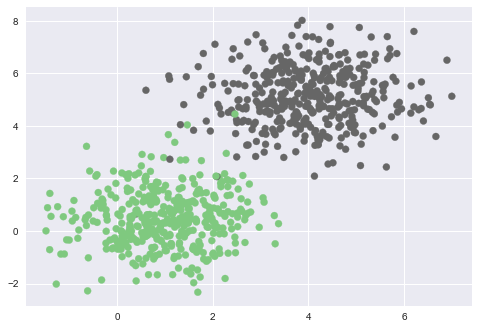

In [14]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [49]:
x_mean = np.mean(X_train,axis=0)
x_std = np.std(X_train,axis=0)

In [50]:
X_train = (X_train-x_mean)/x_std

In [17]:
print(np.std(X_train,axis=0))

[1. 1.]


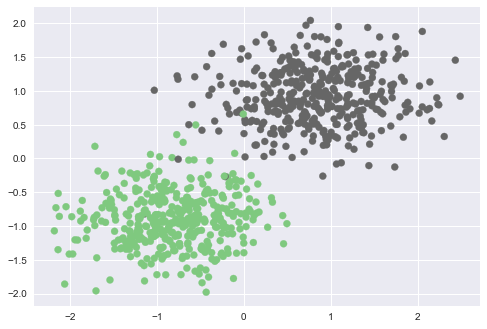

In [18]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()

In [51]:
# apply same transformation to the test_data
X_test = (X_test-x_mean)/x_std

## Logistic Regression Implementation

In [20]:
ones = np.ones((X_train.shape[0],1))

In [21]:
X_train = np.hstack((ones,X_train))

In [22]:
print(X_train.shape)

(800, 3)


In [23]:
Y_train = Y_train.reshape((-1,1))

In [24]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
    
    
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))


def error(X,y,theta):
    hi = hypothesis(X,theta)
    e = -1*np.mean((y*np.log(hi) + ((1-y)*np.log(1-hi))))
    
    return e
    
    
def gradient(X,y,theta):
    hi = hypothesis(X,theta)
    grad = -np.dot(X.T,(y-hi))
    
    m = X.shape[0]
    return grad/m


def gradient_descent(X,y,lr=0.2,max_epochs=500):
    m,n = X.shape
    theta = np.zeros((n,1))
    
    error_list = []
    
    for i in range(max_epochs):
        grad = gradient(X,y,theta)
        
        theta = theta - lr*grad
        error_list.append(error(X,y,theta))
        
    return theta,error_list
    

In [25]:
theta,error_list = gradient_descent(X_train,Y_train)

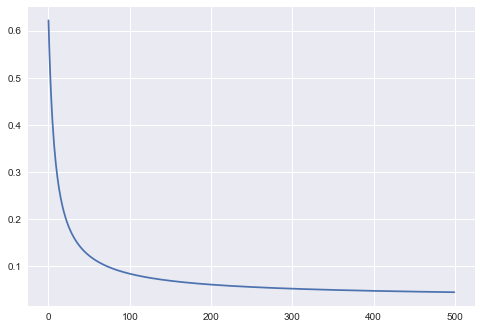

In [26]:
plt.plot(error_list)

#### Testing sigmoid function

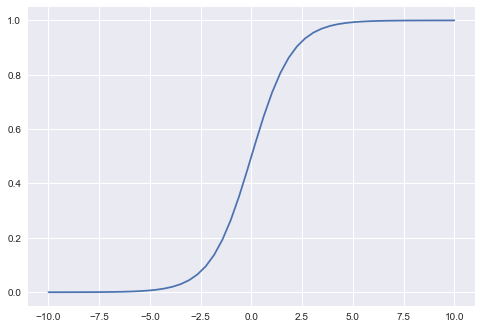

In [27]:
a = np.linspace(-10,10,50)
plt.plot(a,sigmoid(a))
plt.show()

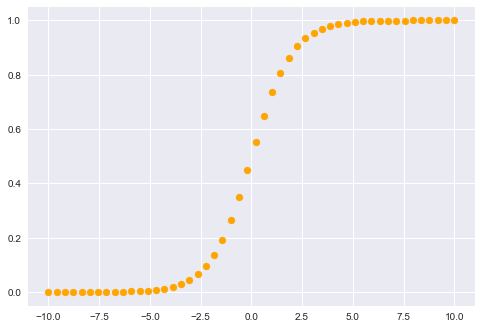

In [28]:
plt.scatter(a,sigmoid(a),color='orange')
plt.show()

## Decision surface Visualisation

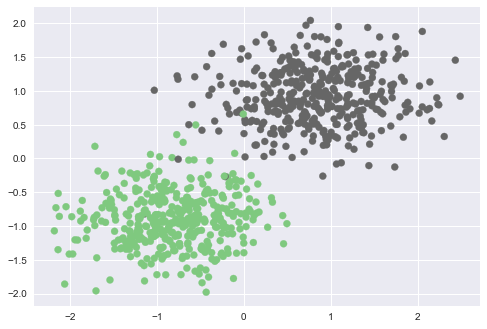

In [29]:
plt.scatter(X_train[:,1],X_train[:,2],c=Y_train.reshape((-1,)),cmap=plt.cm.Accent)
plt.show()

In [30]:
x_line = np.arange(-3,4)
y_line = -((theta[0]+theta[1]*x_line)/theta[2])

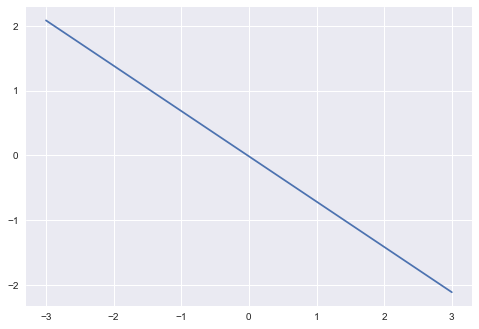

In [31]:
plt.plot(x_line,y_line)

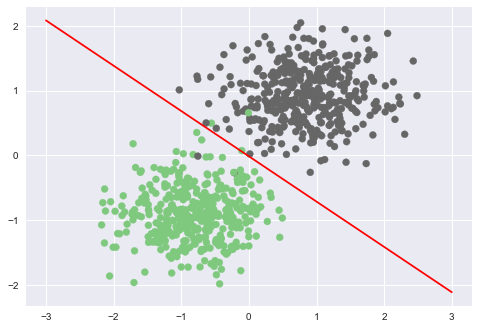

In [32]:
plt.scatter(X_train[:,1],X_train[:,2],c=Y_train.reshape((-1,)),cmap=plt.cm.Accent)
plt.plot(x_line,y_line,color='red')
plt.show()

## Predictions and Accuracy

In [33]:
def predict(X,theta):
    hi = hypothesis(X,theta)
    output = np.zeros((X.shape[0],1))
    
    output[hi>=0.5] = 1
    output = output.astype('int')
    return output
    

In [34]:
def get_accuracy(actual,pred):
    actual = actual.reshape(pred.shape)
    acc = np.sum(actual==pred)/pred.shape[0]
    return acc*100

In [35]:
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones,X_test))
print(X_test.shape)

(200, 3)


In [36]:
train_pred = predict(X_train,theta)
test_pred = predict(X_test,theta)

In [37]:
train_accuracy = get_accuracy(Y_train,train_pred)
print(train_accuracy)

99.25


In [38]:
test_accuracy = get_accuracy(Y_test,test_pred)
print(test_accuracy)

99.0


In [39]:
print(Y_test.shape,test_pred.shape)

(200,) (200, 1)


## Using sk-learn for logistic regression model

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()

In [52]:
model.fit(X_train,Y_train)

LogisticRegression()

In [53]:
theta0 = model.intercept_
thetas = model.coef_
print(theta0,thetas)

[0.07956642] [[2.56304556 4.16948792]]


In [54]:
print(theta)

[[0.05041957]
 [2.44987566]
 [3.50780508]]


In [55]:
print(model.score(X_train,Y_train))

0.9925


In [56]:
print(model.score(X_test,Y_test))

0.99
